In [14]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import shap
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')  # fixed: valid style name
%matplotlib inline


In [22]:
# Cell 2: Load and Prepare Data
df = pd.read_csv('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\data\\insurance_claims_cleaned.csv')
# Select features
numerical_features = ['SumInsured', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
categorical_features = ['Province', 'Gender', 'VehicleType', 'CoverType']
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
features = numerical_features + [col for col in df_encoded.columns if col.startswith(tuple([f'{cat}_' for cat in categorical_features]))]
# Filter for claims > 0 (ClaimSeverity)
df_claims = df_encoded[df_encoded['TotalClaims'] > 0].dropna(subset=['TotalClaims'] + features)
X = df_claims[features]
y = df_claims['TotalClaims']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Organize output
print("Training Set Shape:", X_train.shape)
print("\nFeature Summary:")
feature_df = pd.DataFrame({
    'Feature Type': ['Numerical'] * len(numerical_features) + ['Categorical'] * (len(features) - len(numerical_features)),
    'Feature Name': features
})
display(feature_df)
# Save feature list to file
with open('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\feature_list_task4.txt', 'w') as f:
    f.write("Numerical Features:\n")
    f.write("\n".join(numerical_features) + "\n")
    f.write("\nCategorical Features:\n")
    f.write("\n".join([f for f in features if f not in numerical_features]))

Training Set Shape: (2230, 41)

Feature Summary:


,Feature Type,Feature Name
0,Numerical,SumInsured
1,Numerical,RegistrationYear
2,Numerical,Cylinders
3,Numerical,cubiccapacity
4,Numerical,kilowatts
5,Numerical,NumberOfDoors
6,Categorical,Province_Free State
7,Categorical,Province_Gauteng
8,Categorical,Province_KwaZulu-Natal
9,Categorical,Province_Limpopo


Linear Regression: RMSE = 33630.26410819334 R2 = 0.2967535656326752

Linear Regression: Actual vs Predicted TotalClaims (First 10 rows):


,Actual_TotalClaims,Predicted_TotalClaims,Difference
720078,1140.350877,2326.957564,-1186.606687
994476,6140.350877,951.061297,5189.289580
468389,51573.149123,43618.701855,7954.447267
724570,2192.982456,11672.257537,-9479.275081
736277,1150.000000,-445.612032,1595.612032
50829,5263.157895,5295.598143,-32.440249
861882,100082.342105,36646.813180,63435.528925
100279,750.649123,2450.745865,-1700.096743
517085,6140.350877,14381.725470,-8241.374593
344665,13957.192982,48188.993800,-34231.800817


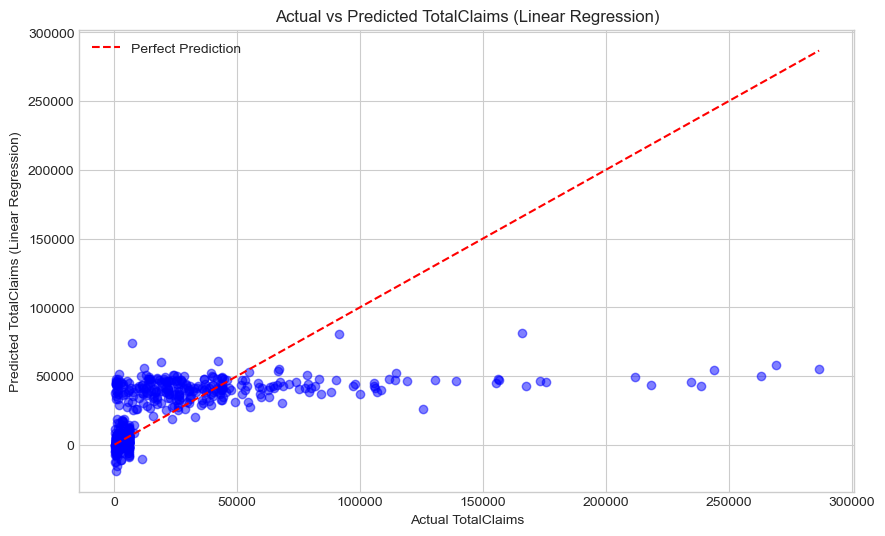

In [23]:
# Cell 3: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression: RMSE =", rmse_lr, "R2 =", r2_lr)
# Actual vs Predicted Comparison
comparison_df_lr = pd.DataFrame({
    'Actual_TotalClaims': y_test,
    'Predicted_TotalClaims': y_pred_lr,
    'Difference': y_test - y_pred_lr
})
print("\nLinear Regression: Actual vs Predicted TotalClaims (First 10 rows):")
display(comparison_df_lr.head(10))
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_lr['Actual_TotalClaims'], comparison_df_lr['Predicted_TotalClaims'], alpha=0.5, color='blue')
plt.plot([comparison_df_lr['Actual_TotalClaims'].min(), comparison_df_lr['Actual_TotalClaims'].max()],
         [comparison_df_lr['Actual_TotalClaims'].min(), comparison_df_lr['Actual_TotalClaims'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual TotalClaims')
plt.ylabel('Predicted TotalClaims (Linear Regression)')
plt.title('Actual vs Predicted TotalClaims (Linear Regression)')
plt.legend()
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\actual_vs_predicted_lr_task4.png')
plt.show()

Random Forest: RMSE = 36854.70374554733 R2 = 0.15543548178568656

Random Forest: Actual vs Predicted TotalClaims (First 10 rows):


,Actual_TotalClaims,Predicted_TotalClaims,Difference
720078,1140.350877,1366.392527,-226.041650
994476,6140.350877,4264.172913,1876.177964
468389,51573.149123,12417.286421,39155.862702
724570,2192.982456,5306.623305,-3113.640849
736277,1150.000000,1313.136343,-163.136343
50829,5263.157895,5549.795131,-286.637236
861882,100082.342105,94325.269407,5757.072698
100279,750.649123,1369.019644,-618.370521
517085,6140.350877,6086.622807,53.728070
344665,13957.192982,37931.988846,-23974.795863


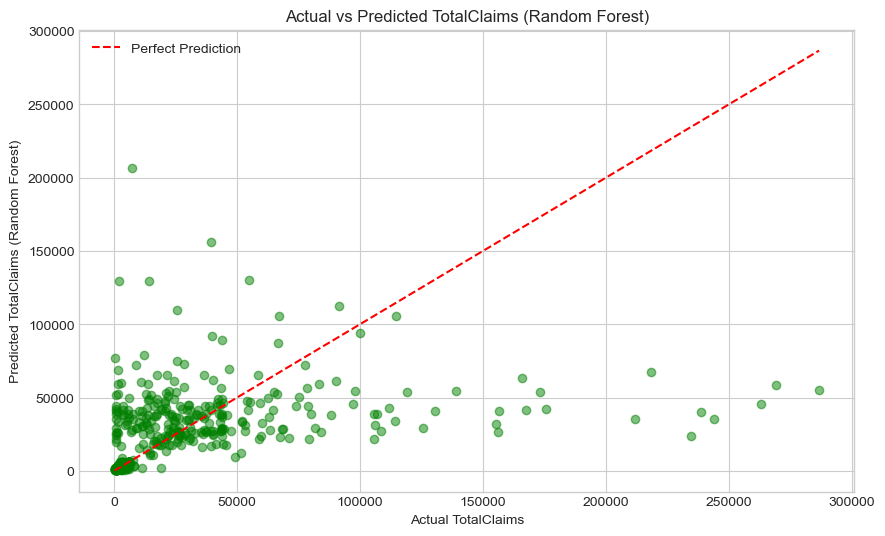

In [24]:
# Cell 4: Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest: RMSE =", rmse_rf, "R2 =", r2_rf)
# Actual vs Predicted Comparison
comparison_df_rf = pd.DataFrame({
    'Actual_TotalClaims': y_test,
    'Predicted_TotalClaims': y_pred_rf,
    'Difference': y_test - y_pred_rf
})
print("\nRandom Forest: Actual vs Predicted TotalClaims (First 10 rows):")
display(comparison_df_rf.head(10))
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_rf['Actual_TotalClaims'], comparison_df_rf['Predicted_TotalClaims'], alpha=0.5, color='green')
plt.plot([comparison_df_rf['Actual_TotalClaims'].min(), comparison_df_rf['Actual_TotalClaims'].max()],
         [comparison_df_rf['Actual_TotalClaims'].min(), comparison_df_rf['Actual_TotalClaims'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual TotalClaims')
plt.ylabel('Predicted TotalClaims (Random Forest)')
plt.title('Actual vs Predicted TotalClaims (Random Forest)')
plt.legend()
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\actual_vs_predicted_rf_task4.png')
plt.show()

XGBoost: RMSE = 39704.194169600225 R2 = 0.019788586562086707

XGBoost: Actual vs Predicted TotalClaims (First 10 rows):


,Actual_TotalClaims,Predicted_TotalClaims,Difference
720078,1140.350877,1876.581787,-736.230910
994476,6140.350877,4825.815430,1314.535448
468389,51573.149123,19332.486328,32240.662795
724570,2192.982456,4977.110840,-2784.128384
736277,1150.000000,1267.541992,-117.541992
50829,5263.157895,5034.872559,228.285336
861882,100082.342105,49918.261719,50164.080387
100279,750.649123,1221.709473,-471.060350
517085,6140.350877,5541.643555,598.707323
344665,13957.192982,33492.046875,-19534.853893


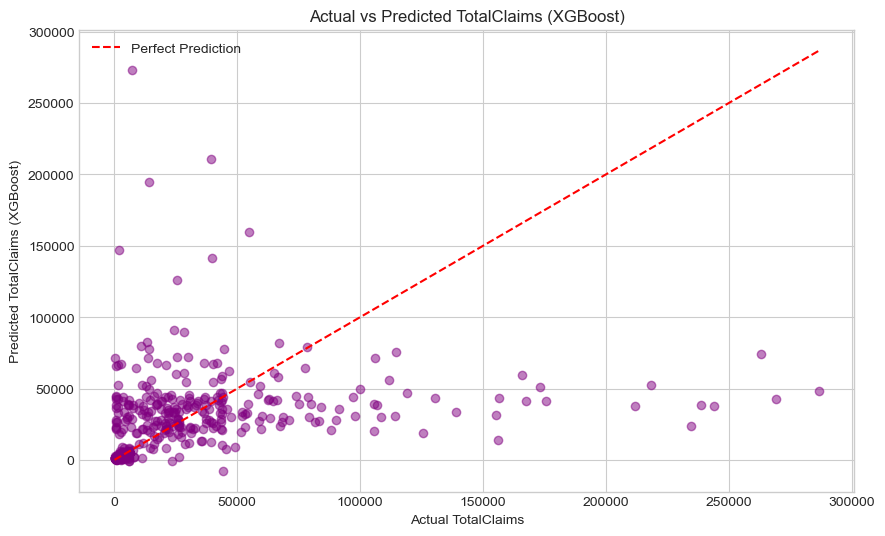

In [25]:
# Cell 5: XGBoost Model
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost: RMSE =", rmse_xgb, "R2 =", r2_xgb)
# Actual vs Predicted Comparison
comparison_df_xgb = pd.DataFrame({
    'Actual_TotalClaims': y_test,
    'Predicted_TotalClaims': y_pred_xgb,
    'Difference': y_test - y_pred_xgb
})
print("\nXGBoost: Actual vs Predicted TotalClaims (First 10 rows):")
display(comparison_df_xgb.head(10))
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_xgb['Actual_TotalClaims'], comparison_df_xgb['Predicted_TotalClaims'], alpha=0.5, color='purple')
plt.plot([comparison_df_xgb['Actual_TotalClaims'].min(), comparison_df_xgb['Actual_TotalClaims'].max()],
         [comparison_df_xgb['Actual_TotalClaims'].min(), comparison_df_xgb['Actual_TotalClaims'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual TotalClaims')
plt.ylabel('Predicted TotalClaims (XGBoost)')
plt.title('Actual vs Predicted TotalClaims (XGBoost)')
plt.legend()
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\actual_vs_predicted_xgb_task4.png')
plt.show()

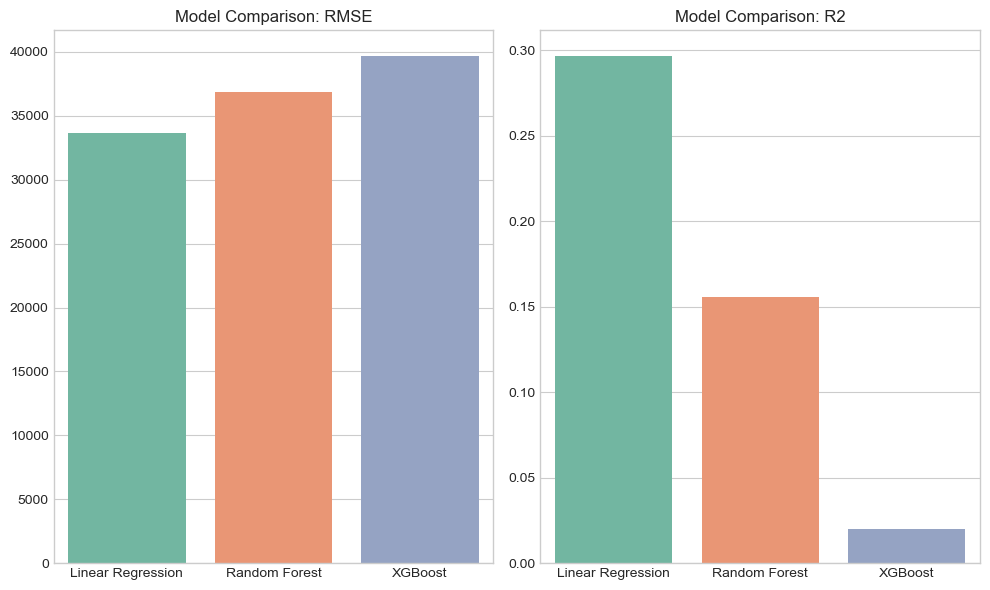

In [26]:
# Cell 6: Model Comparison Visualization
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_scores = [rmse_lr, rmse_rf, rmse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=rmse_scores, hue=models, palette='Set2', legend=False)
plt.title('Model Comparison: RMSE')
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores, hue=models, palette='Set2', legend=False)
plt.title('Model Comparison: R2')
plt.tight_layout()
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\model_comparison_task4.png')
plt.show()

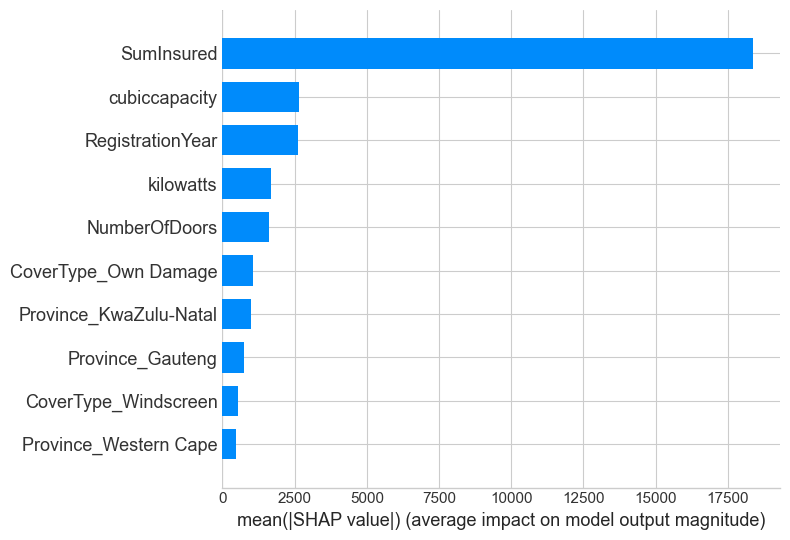

<Figure size 640x480 with 0 Axes>

In [27]:
# Cell 7: Feature Importance with SHAP (XGBoost)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\shap_importance_task4.png')
plt.show()

In [28]:
# Cell 8: Business Recommendations
print("Model Performance Summary:")
print(f"Linear Regression: RMSE = {rmse_lr:.2f}, R2 = {r2_lr:.2f}")
print(f"Random Forest: RMSE = {rmse_rf:.2f}, R2 = {r2_rf:.2f}")
print(f"XGBoost: RMSE = {rmse_xgb:.2f}, R2 = {r2_xgb:.2f}")
print("\nRecommendations:")
print("- Deploy the model with the lowest RMSE and highest R2 for claim severity prediction.")
print("- Adjust premiums based on key features (e.g., SumInsured, Province) identified by SHAP.")
print("- Use insights to target low-risk customers or optimize pricing strategies.")

Model Performance Summary:
Linear Regression: RMSE = 33630.26, R2 = 0.30
Random Forest: RMSE = 36854.70, R2 = 0.16
XGBoost: RMSE = 39704.19, R2 = 0.02

Recommendations:
- Deploy the model with the lowest RMSE and highest R2 for claim severity prediction.
- Adjust premiums based on key features (e.g., SumInsured, Province) identified by SHAP.
- Use insights to target low-risk customers or optimize pricing strategies.
